In [1]:
import pandas as pd

# === 1. CSV-Datei einlesen mit Semikolon als Trennzeichen ===
df = pd.read_csv("tables/Religionen_nach_Kanton.csv", sep=";", encoding="utf-8")

# === 2. Leere Spalten entfernen ===
df = df.loc[:, ~df.columns.str.match(r"^Unnamed")]

# === 3. In langes Format umwandeln ===
id_vars = ['Regions_ID', 'Regionsname', 'Kanton']
value_vars = [col for col in df.columns if col.startswith("y_")]

df_long = pd.melt(df, 
                  id_vars=id_vars, 
                  value_vars=value_vars, 
                  var_name="Jahr", 
                  value_name="Religion")

# === 4. Jahr bereinigen (z. B. "y_1850" → 1850 als int) ===
df_long["Jahr"] = df_long["Jahr"].str.extract(r"y_(\d+)").astype(int)

# === 5. Encoding-Fehler beheben (‚â• → ≥) ===
df_long["Religion"] = df_long["Religion"].str.replace("‚â•", "≥", regex=False)

# === 6. Gruppieren nach Kanton & Jahr: häufigste Angabe behalten ===
df_summary = (
    df_long
    .groupby(["Kanton", "Jahr"])["Religion"]
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
    .reset_index()
)

# === 7. Vorschau anzeigen ===
display(df_summary)

# === Optional: Speichern als neue CSV ===
# df_summary.to_csv("tables/Religionen_pro_Kanton_und_Jahr.csv", index=False)


,Kanton,Jahr,Religion
0,01.01.10,1850,"Mehrheit reformiert: ≥ 80,0 %"
1,01.01.10,1860,"Mehrheit Reformiert: ≥ 80,0 %"
2,01.01.10,1870,"Mehrheit reformiert: ≥ 80,0 %"
3,01.01.10,1880,"Mehrheit reformiert: ≥ 80,0 %"
4,01.01.10,1890,"Mehrheit reformiert: ≥ 80,0 %"
...,...,...,...
794,ZH,1970,"Mehrheit reformiert: 60,0 - 79,9 %"
795,ZH,1980,"Mehrheit reformiert: 60,0 - 79,9 %"
796,ZH,1990,"Mehrheit reformiert: 40,0 - 59,9 %"
797,ZH,2000,"Mehrheit reformiert: 40,0 - 59,9 %"


In [2]:
import pandas as pd

# === 1. CSV-Datei laden ===
df = pd.read_csv("tables/Religionen_nach_Kanton.csv", sep=";", encoding="utf-8")

# === 2. Leere/spätere Spalten entfernen (z. B. "Unnamed: 20") ===
df = df.loc[:, ~df.columns.str.match(r"^Unnamed")]

# === 3. Daten ins Long-Format bringen ===
id_vars = ['Regions_ID', 'Regionsname', 'Kanton']
value_vars = [col for col in df.columns if col.startswith("y_")]

df_long = pd.melt(df, 
                  id_vars=id_vars, 
                  value_vars=value_vars, 
                  var_name="Jahr", 
                  value_name="Religion")

# === 4. Jahr als int extrahieren ===
df_long["Jahr"] = df_long["Jahr"].str.extract(r"y_(\d+)").astype(int)

# === 5. Encoding-Fehler beheben (‚â• → ≥) ===
df_long["Religion"] = df_long["Religion"].str.replace("‚â•", "≥", regex=False)

# === 6. Gruppieren: meistgenannte Religion pro Kanton und Jahr ===
df_kanton_agg = (
    df_long
    .groupby(["Kanton", "Jahr"])["Religion"]
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
    .reset_index()
)

# === 7. Ergebnis anzeigen oder exportieren ===
display(df_kanton_agg)

# Optional speichern:
# df_kanton_agg.to_csv("tables/Kanton_Religionen_Zusammenfassung.csv", index=False)


,Kanton,Jahr,Religion
0,01.01.10,1850,"Mehrheit reformiert: ≥ 80,0 %"
1,01.01.10,1860,"Mehrheit Reformiert: ≥ 80,0 %"
2,01.01.10,1870,"Mehrheit reformiert: ≥ 80,0 %"
3,01.01.10,1880,"Mehrheit reformiert: ≥ 80,0 %"
4,01.01.10,1890,"Mehrheit reformiert: ≥ 80,0 %"
...,...,...,...
794,ZH,1970,"Mehrheit reformiert: 60,0 - 79,9 %"
795,ZH,1980,"Mehrheit reformiert: 60,0 - 79,9 %"
796,ZH,1990,"Mehrheit reformiert: 40,0 - 59,9 %"
797,ZH,2000,"Mehrheit reformiert: 40,0 - 59,9 %"


✔️ Tabelle gespeichert unter: tables/Kanton_Religionen_Zusammenfassung.csv


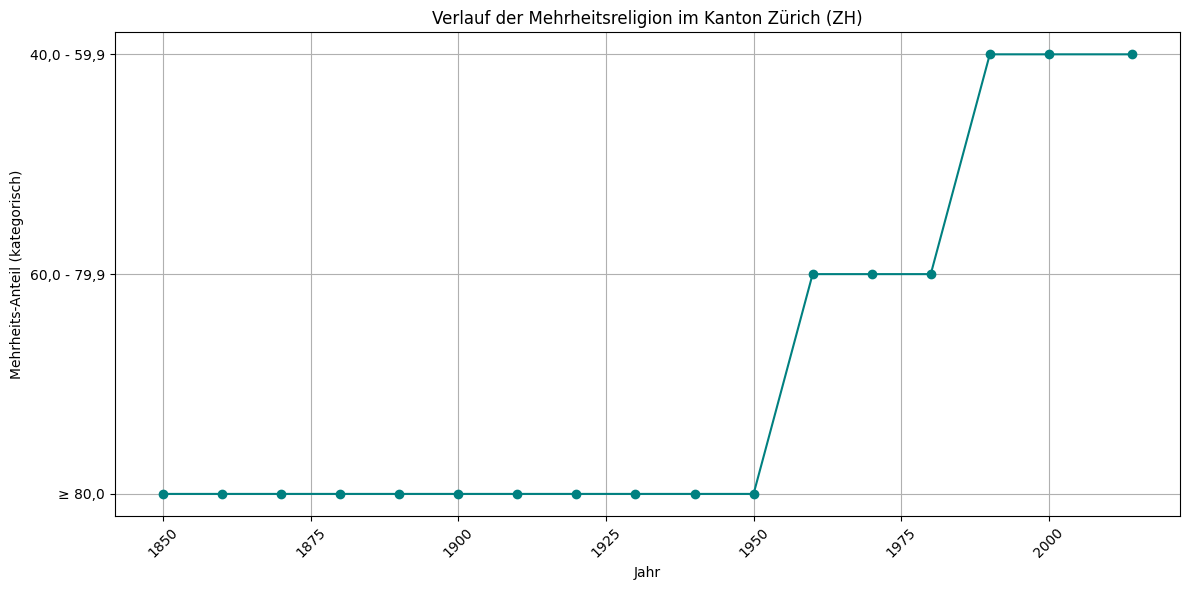

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# === 1. CSV-Datei laden ===
df = pd.read_csv("tables/Religionen_nach_Kanton.csv", sep=";", encoding="utf-8")

# === 2. Leere Spalten entfernen ===
df = df.loc[:, ~df.columns.str.match(r"^Unnamed")]

# === 3. Ins Long-Format umwandeln ===
id_vars = ['Regions_ID', 'Regionsname', 'Kanton']
value_vars = [col for col in df.columns if col.startswith("y_")]

df_long = pd.melt(df, 
                  id_vars=id_vars, 
                  value_vars=value_vars, 
                  var_name="Jahr", 
                  value_name="Religion")

# === 4. Jahr bereinigen ===
df_long["Jahr"] = df_long["Jahr"].str.extract(r"y_(\d+)").astype(int)

# === 5. Encoding-Fehler beheben ===
df_long["Religion"] = df_long["Religion"].str.replace("‚â•", "≥", regex=False)

# === 6. Gruppieren nach Kanton & Jahr ===
df_kanton_agg = (
    df_long
    .groupby(["Kanton", "Jahr"])["Religion"]
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
    .reset_index()
)

# === 7. Tabelle speichern ===
output_path = "tables/Kanton_Religionen_Zusammenfassung.csv"
df_kanton_agg.to_csv(output_path, index=False)
print(f"✔️ Tabelle gespeichert unter: {output_path}")

# === 8. Visualisierung: Verlauf im Kanton ZH ===
# Filter für Zürich (als Beispiel)
zh = df_kanton_agg[df_kanton_agg["Kanton"] == "ZH"].copy()

# Für Darstellung: nur den Prozentbereich extrahieren
zh["Prozentbereich"] = zh["Religion"].str.extract(r"(\d{1,2},?\d* ?[-–] ?\d{1,2},?\d*|≥ ?\d{1,2},?\d*)")

# Plot vorbereiten
plt.figure(figsize=(12, 6))
plt.plot(zh["Jahr"], zh["Prozentbereich"], marker="o", linestyle="-", color="teal")

plt.title("Verlauf der Mehrheitsreligion im Kanton Zürich (ZH)")
plt.xlabel("Jahr")
plt.ylabel("Mehrheits-Anteil (kategorisch)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# === 1. CSV-Datei laden ===
df = pd.read_csv("tables/Religionen_nach_Kanton.csv", sep=";", encoding="utf-8")

# === 2. Leere Spalten entfernen ===
df = df.loc[:, ~df.columns.str.match(r"^Unnamed")]

# === 3. Ins Long-Format umwandeln ===
id_vars = ['Regions_ID', 'Regionsname', 'Kanton']
value_vars = [col for col in df.columns if col.startswith("y_")]

df_long = pd.melt(df, 
                  id_vars=id_vars, 
                  value_vars=value_vars, 
                  var_name="Jahr", 
                  value_name="Religion")

# === 4. Jahr bereinigen ===
df_long["Jahr"] = df_long["Jahr"].str.extract(r"y_(\d+)").astype(int)

# === 5. Encoding-Fehler beheben ===
df_long["Religion"] = df_long["Religion"].str.replace("‚â•", "≥", regex=False)

# === 6. Nur gültige Kantone zulassen (2 Großbuchstaben) ===
df_long["Kanton"] = df_long["Kanton"].astype(str).str.strip()
df_long = df_long[df_long["Kanton"].str.match(r"^[A-Z]{2}$")]

# === 7. Gruppieren nach Kanton & Jahr ===
df_kanton_agg = (
    df_long
    .groupby(["Kanton", "Jahr"])["Religion"]
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
    .reset_index()
)

# === 8. Tabelle speichern ===
output_path = "tables/Kanton_Religionen_Zusammenfassung.csv"
df_kanton_agg.to_csv(output_path, index=False)
print(f"✔️ Tabelle gespeichert unter: {output_path}")



✔️ Tabelle gespeichert unter: tables/Kanton_Religionen_Zusammenfassung.csv


In [5]:
import pandas as pd
import re

# === 1. CSV laden ===
df = pd.read_csv("tables/Religionen_nach_Kanton.csv", sep=";", encoding="utf-8")

# === 2. Leere Spalten entfernen ===
df = df.loc[:, ~df.columns.str.match(r"^Unnamed")]

# === 3. In Long-Format bringen ===
id_vars = ['Regions_ID', 'Regionsname', 'Kanton']
value_vars = [col for col in df.columns if col.startswith("y_")]

df_long = pd.melt(df, 
                  id_vars=id_vars, 
                  value_vars=value_vars, 
                  var_name="Jahr", 
                  value_name="Religion")

# === 4. Jahr bereinigen ===
df_long["Jahr"] = df_long["Jahr"].str.extract(r"y_(\d+)").astype(int)

# === 5. Encoding-Fehler korrigieren ===
df_long["Religion"] = df_long["Religion"].str.replace("‚â•", "≥", regex=False)

# === 6. Nur gültige Kantone behalten (z. B. ZH, AG, BE etc.) ===
df_long["Kanton"] = df_long["Kanton"].astype(str).str.strip()
df_long = df_long[df_long["Kanton"].str.match(r"^[A-Z]{2}$")]

# === 7. Aggregieren: häufigste Religion pro Kanton & Jahr ===
df_kanton_agg = (
    df_long
    .groupby(["Kanton", "Jahr"])["Religion"]
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
    .reset_index()
)

# === 8. Gruppenzuweisung pro Jahr: katholisch / reformiert / sonst ===
def religion_to_group(religion_text, jahr):
    if pd.isna(religion_text):
        return None
    text = religion_text.lower()
    if "katholisch" in text:
        return f"{jahr}_kat"
    elif "reformiert" in text:
        return f"{jahr}_ref"
    else:
        return f"{jahr}_other"

# Pivotieren, damit jede Zeile ein Kanton ist, Spalten = Jahre
df_pivot = df_kanton_agg.pivot(index="Kanton", columns="Jahr", values="Religion")

# Neue Gruppenspalten erzeugen
df_grouped = pd.DataFrame(index=df_pivot.index)

for jahr in df_pivot.columns:
    df_grouped[f"{jahr}_gruppe"] = df_pivot[jahr].apply(lambda x: religion_to_group(x, jahr))

# === 9. Vorschau und optional speichern ===
display(df_grouped)

# Optional: als CSV speichern
# df_grouped.to_csv("tables/Kantonale_Religionsgruppen.csv")


,1850_gruppe,1860_gruppe,1870_gruppe,1880_gruppe,1890_gruppe,1900_gruppe,1910_gruppe,1920_gruppe,1930_gruppe,1940_gruppe,1950_gruppe,1960_gruppe,1970_gruppe,1980_gruppe,1990_gruppe,2000_gruppe,2014_gruppe
Kanton,,,,,,,,,,,,,,,,,
AG,1850_kat,1860_kat,1870_kat,1880_kat,1890_kat,1900_kat,1910_kat,1920_ref,1930_ref,1940_ref,1950_ref,1960_kat,1970_ref,1980_ref,1990_kat,2000_kat,2014_kat
AI,1850_kat,1860_kat,1870_kat,1880_kat,1890_kat,1900_kat,1910_kat,1920_kat,1930_kat,1940_kat,1950_kat,1960_kat,1970_kat,1980_kat,1990_kat,2000_kat,2014_kat
AR,1850_ref,1860_ref,1870_ref,1880_ref,1890_ref,1900_ref,1910_ref,1920_ref,1930_ref,1940_ref,1950_ref,1960_ref,1970_ref,1980_ref,1990_ref,2000_ref,2014_ref
BE,1850_ref,1860_ref,1870_ref,1880_ref,1890_ref,1900_ref,1910_ref,1920_ref,1930_ref,1940_ref,1950_ref,1960_ref,1970_ref,1980_ref,1990_ref,2000_ref,2014_ref
BL,1850_ref,1860_ref,1870_ref,1880_ref,1890_ref,1900_ref,1910_ref,1920_ref,1930_ref,1940_ref,1950_ref,1960_ref,1970_ref,1980_ref,1990_ref,2000_ref,2014_ref
BS,1850_ref,1860_ref,1870_ref,1880_ref,1890_ref,1900_ref,1910_ref,1920_ref,1930_ref,1940_ref,1950_ref,1960_ref,1970_ref,1980_ref,1990_ref,2000_other,2014_other
FR,1850_kat,1860_kat,1870_kat,1880_kat,1890_kat,1900_kat,1910_kat,1920_kat,1930_kat,1940_kat,1950_kat,1960_kat,1970_kat,1980_kat,1990_kat,2000_kat,2014_kat
GE,1850_kat,1860_kat,1870_kat,1880_kat,1890_kat,1900_kat,1910_kat,1920_kat,1930_ref,1940_kat,1950_ref,1960_kat,1970_kat,1980_kat,1990_kat,2000_kat,2014_kat
GR,1850_ref,1860_ref,1870_ref,1880_ref,1890_ref,1900_ref,1910_ref,1920_ref,1930_ref,1940_ref,1950_ref,1960_kat,1970_kat,1980_kat,1990_kat,2000_ref,2014_ref
